# Python scripting for network analysis
Lab session on February 20th

# Python environments: Spyder, Jupyter

console

editor

jupyter notebook

# Some useful features

tab-completion

"?" lookup

# Jupyter notebook: mix of editor & console

multiline editing:
1. Ctrl-Enter: run cell
1. Shift-Enter: run & select next
1. Alt-Enter: run & insert cell

in-line output

# Jupyter notebook: different cell types

python code (the default)

markdown: headings, lists, etc. including math notation: $e = A_{ij}$ or as centered: $$E = mc^2$$

possibly other code (R, Julia, etc. — 40 overall)

# Jupyter notebook caveats

out-of-order cells

File → Download As  — .ipynb, .py, .html

# This presentation is also a jupyter notebook

embedded cells:

In [1]:
1+1

2

will upload in .ipynb format

need "pip install RISE"

# NetworkX

# create network, nodes, edges

In [2]:
import networkx

In [3]:
g = networkx.Graph()

In [4]:
g

In [5]:
g.add_node(1)

In [6]:
g.nodes()

NodeView((1,))

In [7]:
g.add_edge(2,3)

In [11]:
networkx.MultiGraph?

In [12]:
g.nodes()

NodeView((1, 2, 3))

In [13]:
g.edges()

EdgeView([(2, 3)])

In [14]:
g.add_node("asdf")

In [15]:
g.add_node((1,2,3))

In [16]:
g.nodes()

NodeView((1, 2, 3, 'asdf', (1, 2, 3)))

In [17]:
g.add_node([1,2,3])

TypeError: unhashable type: 'list'

In [18]:
hash((1,2,3))

2528502973977326415

In [19]:
hash([1,2,3])

TypeError: unhashable type: 'list'

# create network, nodes, edges -- caveats

different network types

adding edge silently adds missing nodes

not everything can be used as nodes

# Node, edge attributes

In [20]:
g.add_node(42, some_attribute='value')
g.add_edge(42, 137, some_other_attribute=[1,2,3])

In [25]:
g.node[42]

{'some_attribute': 'value', 'new_attribute': 'new_value'}

In [24]:
g[42][137]

{'some_other_attribute': [1, 2, 3], 'other_new_attribute': [4, 5, 6]}

In [23]:
g.node[42]['new_attribute'] = 'new_value'
g[42][137]['other_new_attribute'] = [4,5,6]

# Drawing the network

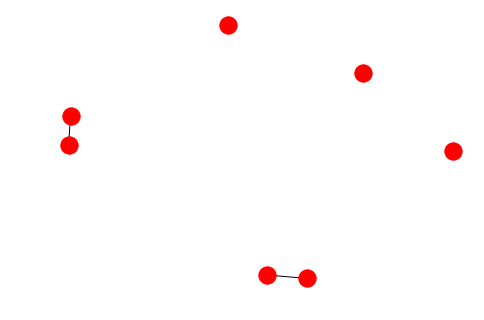

In [27]:
networkx.draw(g)

In [28]:
import matplotlib.pyplot as plt

In [29]:
plt.show()

(might need to call matplotlib's show() function)

comparison with cytoscape

# Iterating over nodes, edges

In [30]:
g.nodes()
g.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}, 'asdf': {}, (1, 2, 3): {}, 42: {'some_attribute': 'value', 'new_attribute': 'new_value'}, 137: {}})

In [31]:
for node, attrs in g.nodes(data=True):
    print(node, attrs)

1 {}
2 {}
3 {}
asdf {}
(1, 2, 3) {}
42 {'some_attribute': 'value', 'new_attribute': 'new_value'}
137 {}


In [32]:
for source, target, attrs in g.edges(data=True):
    print(source, target, attrs)

2 3 {}
42 137 {'some_other_attribute': [1, 2, 3], 'other_new_attribute': [4, 5, 6]}


# Loading data

In [33]:
graph = networkx.read_edgelist('word_association_graph_DSF.txt', 
                               create_using=networkx.DiGraph(), 
                               nodetype=str, data=[('weight', float),])

In [34]:
graph.number_of_nodes()

10616

In [35]:
graph.number_of_edges()

72171

# Calculating degrees

In [37]:
len(graph.neighbors(n))

In [41]:
degrees = {}
for source, target, attrs in graph.edges(data=True):
    if source not in degrees:
        degrees[source] = 1 #.. .create it and set to 1...
    else:
        degrees[source] += 1 #.. .increment it....

In [42]:
degrees['APPLE']

17

In [44]:
graph.has_node('ALIEN')

True

In [45]:
degrees['ALIEN'],

KeyError: 'ALIEN'

In [ ]:
degrees = {}
for source, target, attrs in graph.edges(data=True):
    if source not in degrees:
        degrees[source] = 1 #.. .create it and set to 1...
    else:
        degrees[source] += 1 #.. .increment it....

In [38]:
d = {}

In [39]:
d[1] += 1

KeyError: 1

In [57]:
out_degrees = {}
for node in graph.nodes():
    out_degrees[node] = 0
for source, target, attrs in graph.edges(data=True):
    out_degrees[source] += 1 #.. .increment it....

In [47]:
degrees['ALIEN']

0

In [48]:
import collections

In [50]:
dd = collections.defaultdict(int)

In [51]:
dd[1]= 42

In [52]:
dd[2] += 1

In [53]:
dd

defaultdict(int, {1: 42, 2: 1})

In [54]:
dd['ALIEN']

0

In [56]:
in_degrees = {}
for node in graph.nodes():
    in_degrees[node] = 0
for source, target, attrs in graph.edges(data=True):
    in_degrees[target] += 1 #.. .increment it....

# Looking at the results

In [58]:
in_degrees['ALIEN']

7

In [60]:
in_degrees.values()

dict_values([7, 6, 1, 1, 47, 2, 35, 50, 47, 63, 9, 5, 51, 1, 1, 156, 11, 2, 10, 17, 18, 132, 49, 1, 1, 21, 70, 13, 1, 6, 83, 3, 1, 2, 34, 15, 158, 110, 1, 1, 22, 1, 1, 7, 10, 101, 2, 4, 1, 8, 70, 36, 63, 18, 14, 16, 36, 4, 8, 1, 5, 48, 1, 51, 1, 51, 13, 4, 53, 13, 50, 32, 12, 17, 6, 196, 1, 1, 3, 2, 50, 3, 11, 92, 28, 7, 10, 40, 1, 41, 3, 103, 19, 17, 30, 3, 25, 4, 18, 32, 14, 20, 12, 5, 27, 97, 38, 48, 65, 120, 2, 42, 1, 57, 95, 36, 15, 255, 24, 23, 24, 26, 2, 4, 33, 183, 90, 5, 6, 1, 5, 8, 43, 45, 3, 1, 14, 4, 52, 129, 10, 15, 21, 20, 46, 80, 16, 2, 70, 46, 11, 7, 35, 1, 53, 36, 6, 2, 6, 5, 2, 13, 73, 7, 1, 6, 4, 3, 324, 28, 4, 54, 46, 16, 46, 302, 26, 7, 1, 1, 154, 14, 1, 2, 17, 5, 276, 12, 44, 229, 25, 46, 90, 75, 137, 1, 5, 2, 11, 19, 17, 3, 259, 1, 85, 44, 70, 10, 4, 30, 49, 32, 94, 17, 9, 17, 19, 16, 18, 1, 33, 67, 40, 18, 17, 1, 40, 33, 23, 38, 4, 21, 61, 80, 19, 1, 19, 2, 71, 1, 9, 19, 7, 1, 10, 13, 8, 13, 13, 32, 29, 37, 10, 59, 2, 11, 1, 1, 4, 23, 1, 3, 1, 145, 1, 2, 18, 91,

In [61]:
import matplotlib.pyplot as plt

(array([5633.,  256.,  882., 1090., 1049., 1086.,  404.,  182.,   27.,
           7.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

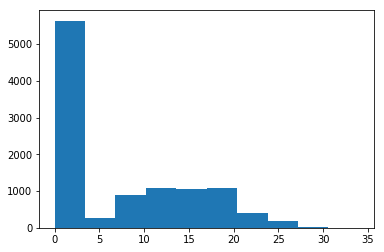

In [63]:
plt.hist(out_degrees.values())

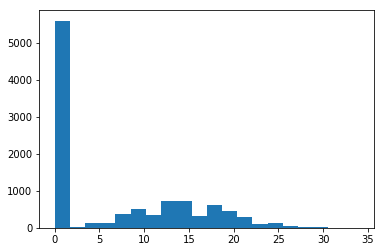

In [65]:
_ = plt.hist(out_degrees.values(), bins=20)

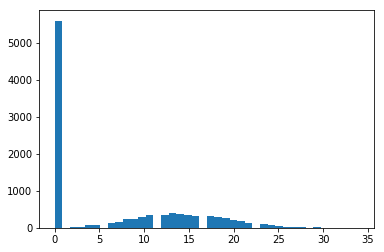

In [66]:
_ = plt.hist(out_degrees.values(), bins=40)

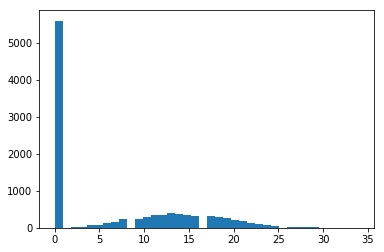

In [67]:
_ = plt.hist(out_degrees.values(), bins=38)

In [68]:
max(out_degrees.values())

34

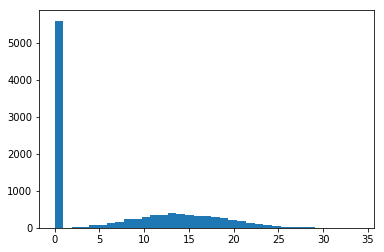

In [69]:
_ = plt.hist(out_degrees.values(), bins=35)

In [70]:
len([v for v in out_degrees.values() if v == 1])

1

In [71]:
len([v for v in out_degrees.values() if v == 2])

13

In [72]:
len([v for v in out_degrees.values() if v == 0])

5598

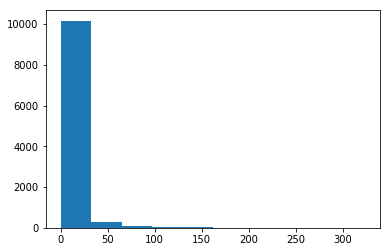

In [73]:
_ = plt.hist(in_degrees.values())

In [74]:
max(in_degrees.values())

324

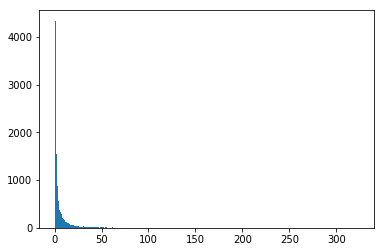

In [75]:
_ = plt.hist(in_degrees.values(), bins=325)

In [76]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [79]:
_ = plt.hist(in_degrees.values(), bins=325)

In [80]:
_ = plt.hist(in_degrees.values(), bins=325, log=True)

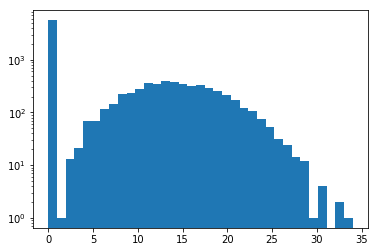

In [81]:
%matplotlib inline
_ = plt.hist(out_degrees.values(), bins=35, log=True)

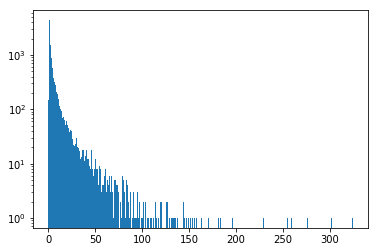

In [82]:
_ = plt.hist(in_degrees.values(), bins=325, log=True)

# Homework assignment

Calculate, plot and describe the in- and out-strength (weighted degree) distribution of the word association dataset

Write a script to create a network of a ring of $N$ nodes, with first and second neighbors connected. An example:
<center><img src='ring_network_example.png' style="width:25%;"></center>